# Tutorial - Step1 : MTMR pretraining with Metric learning

## 1. Import requirements

In [1]:
import os
import sys
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
sys.path = [os.path.abspath(os.path.join(os.getcwd(), os.pardir))] + sys.path

In [3]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from vae_triplet import SmilesAutoencoder

## 2. Configure GPU (if available)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [5]:
PROPERTY_NAME = "logp04"

## 4. Set directories (for inputs and outputs)

In [6]:
input_dir = os.path.abspath(os.path.join(os.pardir, "DATA", PROPERTY_NAME))

In [7]:
output_dir = f"outputs_6-1_{PROPERTY_NAME.upper()}_pretraining"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [8]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [9]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [10]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

## 7. Initialize a generator of MTMR

In [11]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [12]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             total_steps=200000,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00200000]  loss(tr): 10.904  loss_recon_src(tr): 3.413  loss_recon_tar(tr): 3.420  loss_recon_neg(tr): 3.416  loss_kld(tr): 1.925  loss_triplet(tr): 0.727  valid_ratio(va): 0.095  similarity(va): 0.002
[00001000/00200000]  loss(tr): 3.615  loss_recon_src(tr): 0.686  loss_recon_tar(tr): 0.596  loss_recon_neg(tr): 0.659  loss_kld(tr): 1.226  loss_triplet(tr): 0.207
[00002000/00200000]  loss(tr): 3.204  loss_recon_src(tr): 0.601  loss_recon_tar(tr): 0.530  loss_recon_neg(tr): 0.608  loss_kld(tr): 1.178  loss_triplet(tr): 0.173
[00003000/00200000]  loss(tr): 2.479  loss_recon_src(tr): 0.572  loss_recon_tar(tr): 0.505  loss_recon_neg(tr): 0.604  loss_kld(tr): 1.129  loss_triplet(tr): 0.107
[00004000/00200000]  loss(tr): 2.681  loss_recon_src(tr): 0.590  loss_recon_tar(tr): 0.527  loss_recon_neg(tr): 0.567  loss_kld(tr): 1.242  loss_triplet(tr): 0.116
[00005000/00200000]  loss(tr): 2.713  loss_recon_src(tr): 0.550  loss_recon_tar(tr): 0.506  loss_recon_neg(tr): 0.553  loss_kld(tr):

[00049000/00200000]  loss(tr): 1.896  loss_recon_src(tr): 0.470  loss_recon_tar(tr): 0.456  loss_recon_neg(tr): 0.517  loss_kld(tr): 1.052  loss_triplet(tr): 0.060
[00050000/00200000]  loss(tr): 1.823  loss_recon_src(tr): 0.467  loss_recon_tar(tr): 0.419  loss_recon_neg(tr): 0.473  loss_kld(tr): 0.913  loss_triplet(tr): 0.068  valid_ratio(va): 1.000  similarity(va): 0.116
[00051000/00200000]  loss(tr): 1.775  loss_recon_src(tr): 0.456  loss_recon_tar(tr): 0.442  loss_recon_neg(tr): 0.496  loss_kld(tr): 0.998  loss_triplet(tr): 0.054
[00052000/00200000]  loss(tr): 1.925  loss_recon_src(tr): 0.463  loss_recon_tar(tr): 0.421  loss_recon_neg(tr): 0.465  loss_kld(tr): 0.946  loss_triplet(tr): 0.075
[00053000/00200000]  loss(tr): 1.878  loss_recon_src(tr): 0.470  loss_recon_tar(tr): 0.437  loss_recon_neg(tr): 0.469  loss_kld(tr): 0.956  loss_triplet(tr): 0.069
[00054000/00200000]  loss(tr): 1.871  loss_recon_src(tr): 0.459  loss_recon_tar(tr): 0.423  loss_recon_neg(tr): 0.478  loss_kld(tr): 

[00098000/00200000]  loss(tr): 1.629  loss_recon_src(tr): 0.458  loss_recon_tar(tr): 0.400  loss_recon_neg(tr): 0.480  loss_kld(tr): 0.944  loss_triplet(tr): 0.046
[00099000/00200000]  loss(tr): 1.582  loss_recon_src(tr): 0.452  loss_recon_tar(tr): 0.401  loss_recon_neg(tr): 0.469  loss_kld(tr): 0.852  loss_triplet(tr): 0.051
[00100000/00200000]  loss(tr): 1.615  loss_recon_src(tr): 0.443  loss_recon_tar(tr): 0.420  loss_recon_neg(tr): 0.481  loss_kld(tr): 0.906  loss_triplet(tr): 0.048  valid_ratio(va): 1.000  similarity(va): 0.112
[00101000/00200000]  loss(tr): 1.653  loss_recon_src(tr): 0.467  loss_recon_tar(tr): 0.440  loss_recon_neg(tr): 0.481  loss_kld(tr): 0.886  loss_triplet(tr): 0.053
[00102000/00200000]  loss(tr): 1.737  loss_recon_src(tr): 0.471  loss_recon_tar(tr): 0.421  loss_recon_neg(tr): 0.461  loss_kld(tr): 0.943  loss_triplet(tr): 0.057
[00103000/00200000]  loss(tr): 1.626  loss_recon_src(tr): 0.489  loss_recon_tar(tr): 0.449  loss_recon_neg(tr): 0.481  loss_kld(tr): 

[00147000/00200000]  loss(tr): 1.726  loss_recon_src(tr): 0.473  loss_recon_tar(tr): 0.453  loss_recon_neg(tr): 0.472  loss_kld(tr): 0.880  loss_triplet(tr): 0.061
[00148000/00200000]  loss(tr): 1.744  loss_recon_src(tr): 0.468  loss_recon_tar(tr): 0.439  loss_recon_neg(tr): 0.477  loss_kld(tr): 0.873  loss_triplet(tr): 0.064
[00149000/00200000]  loss(tr): 1.583  loss_recon_src(tr): 0.460  loss_recon_tar(tr): 0.444  loss_recon_neg(tr): 0.452  loss_kld(tr): 0.929  loss_triplet(tr): 0.043
[00150000/00200000]  loss(tr): 1.531  loss_recon_src(tr): 0.467  loss_recon_tar(tr): 0.446  loss_recon_neg(tr): 0.443  loss_kld(tr): 0.938  loss_triplet(tr): 0.037  valid_ratio(va): 1.000  similarity(va): 0.112
[00151000/00200000]  loss(tr): 1.726  loss_recon_src(tr): 0.474  loss_recon_tar(tr): 0.414  loss_recon_neg(tr): 0.478  loss_kld(tr): 0.902  loss_triplet(tr): 0.060
[00152000/00200000]  loss(tr): 1.729  loss_recon_src(tr): 0.484  loss_recon_tar(tr): 0.439  loss_recon_neg(tr): 0.474  loss_kld(tr): 

[00196000/00200000]  loss(tr): 1.500  loss_recon_src(tr): 0.437  loss_recon_tar(tr): 0.440  loss_recon_neg(tr): 0.486  loss_kld(tr): 0.869  loss_triplet(tr): 0.040
[00197000/00200000]  loss(tr): 1.630  loss_recon_src(tr): 0.464  loss_recon_tar(tr): 0.405  loss_recon_neg(tr): 0.467  loss_kld(tr): 0.868  loss_triplet(tr): 0.054
[00198000/00200000]  loss(tr): 1.518  loss_recon_src(tr): 0.464  loss_recon_tar(tr): 0.421  loss_recon_neg(tr): 0.456  loss_kld(tr): 0.838  loss_triplet(tr): 0.046
[00199000/00200000]  loss(tr): 1.690  loss_recon_src(tr): 0.466  loss_recon_tar(tr): 0.423  loss_recon_neg(tr): 0.457  loss_kld(tr): 0.878  loss_triplet(tr): 0.059
[00200000/00200000]  loss(tr): 1.333  loss_recon_src(tr): 0.472  loss_recon_tar(tr): 0.418  loss_recon_neg(tr): 0.461  loss_kld(tr): 0.834  loss_triplet(tr): 0.027  valid_ratio(va): 1.000  similarity(va): 0.113


## 9. Visualize for loss analysis

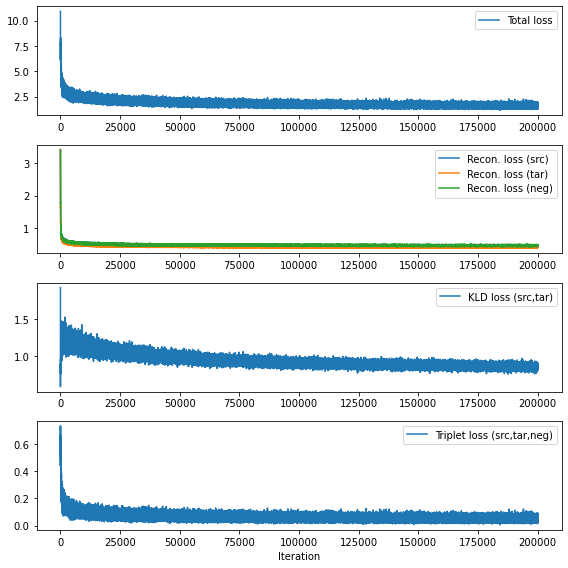

In [13]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_KL_DIVERGENCE"], label="KLD loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_TRIPLET"], label="Triplet loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

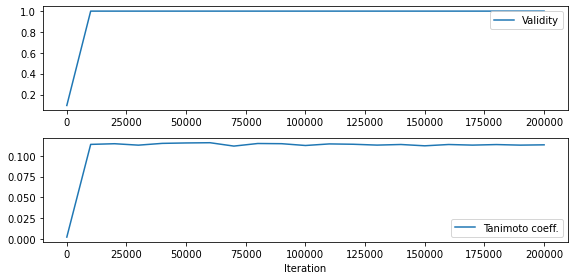

In [14]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()